# Phishing Website Detection

In this notebook, we use the [UCI Phishing Websites Dataset](https://archive.ics.uci.edu/ml/datasets/phishing+websites) to train various ML models & validate their performance on classifying websites as *phishing (-1)* or *legitimate (1)* based on a number of features extracted from the website & URL as indicated in [this paper](https://www.researchgate.net/publication/261636543_Intelligent_Rule_based_Phishing_Websites_Classification).

For all features & result, the following holds:

- 1  => Legitimate
- 0  => Suspicious
- -1 => Phishy

## Loading the Dataset & Creating the Training-Validation Split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [2]:
df = pd.read_csv("uci_phishing_websites_dataset.csv")
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
X = df.values[:, :-1]
y = df.values[:, -1]

print(X.shape, y.shape)

(11055, 30) (11055,)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(8844, 30) (2211, 30) (8844,) (2211,)


In [21]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_valid, return_counts=True))

(array([-1,  1], dtype=int64), array([3942, 4902], dtype=int64))
(array([-1,  1], dtype=int64), array([ 956, 1255], dtype=int64))


## Experimenting with Different ML Models:

### SVM:

In [39]:
from sklearn.svm import SVC

# Linear Kernel SVMs
print("Linear Kernel SVMs\n====================================")
for c in np.logspace(-4, 1, 11):
    clf = SVC(C=c, kernel="linear", random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
    print("[C = %.4f]\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f" % (c, acc, p, r, f1))
    

Linear Kernel SVMs
[C = 0.0001]	 Accuracy: 90.64%	 Precision: 0.89	 Recall: 0.95	 F1 Score: 0.92
[C = 0.0003]	 Accuracy: 91.45%	 Precision: 0.90	 Recall: 0.95	 F1 Score: 0.93
[C = 0.0010]	 Accuracy: 91.95%	 Precision: 0.91	 Recall: 0.95	 F1 Score: 0.93
[C = 0.0032]	 Accuracy: 92.36%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.93
[C = 0.0100]	 Accuracy: 92.67%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.94
[C = 0.0316]	 Accuracy: 92.58%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.94
[C = 0.1000]	 Accuracy: 92.72%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.94
[C = 0.3162]	 Accuracy: 92.81%	 Precision: 0.93	 Recall: 0.95	 F1 Score: 0.94
[C = 1.0000]	 Accuracy: 92.85%	 Precision: 0.93	 Recall: 0.95	 F1 Score: 0.94
[C = 3.1623]	 Accuracy: 92.85%	 Precision: 0.93	 Recall: 0.95	 F1 Score: 0.94
[C = 10.0000]	 Accuracy: 92.85%	 Precision: 0.93	 Recall: 0.95	 F1 Score: 0.94


#### For best model: C = 1 (Accuracy = 92.85% & F1 Score = 0.94)

In [42]:
# RBF Kernel SVMs
print("RBF Kernel SVMs\n====================================")
for c in np.logspace(-3, 3, 13):
    clf = SVC(C=c, kernel="rbf", random_state=42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
    print("[C = %.4f]\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f" % (c, acc, p, r, f1))
    

RBF Kernel SVMs
[C = 0.0010]	 Accuracy: 56.76%	 Precision: 0.57	 Recall: 1.00	 F1 Score: 0.72
[C = 0.0032]	 Accuracy: 84.31%	 Precision: 0.80	 Recall: 0.97	 F1 Score: 0.88
[C = 0.0100]	 Accuracy: 91.45%	 Precision: 0.90	 Recall: 0.96	 F1 Score: 0.93
[C = 0.0316]	 Accuracy: 92.49%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.94
[C = 0.1000]	 Accuracy: 92.94%	 Precision: 0.92	 Recall: 0.95	 F1 Score: 0.94
[C = 0.3162]	 Accuracy: 94.08%	 Precision: 0.93	 Recall: 0.96	 F1 Score: 0.95
[C = 1.0000]	 Accuracy: 94.71%	 Precision: 0.94	 Recall: 0.97	 F1 Score: 0.95
[C = 3.1623]	 Accuracy: 95.61%	 Precision: 0.95	 Recall: 0.97	 F1 Score: 0.96
[C = 10.0000]	 Accuracy: 96.25%	 Precision: 0.96	 Recall: 0.98	 F1 Score: 0.97
[C = 31.6228]	 Accuracy: 96.29%	 Precision: 0.96	 Recall: 0.98	 F1 Score: 0.97
[C = 100.0000]	 Accuracy: 96.47%	 Precision: 0.96	 Recall: 0.98	 F1 Score: 0.97
[C = 316.2278]	 Accuracy: 96.29%	 Precision: 0.96	 Recall: 0.98	 F1 Score: 0.97
[C = 1000.0000]	 Accuracy: 96.38%	 Precisi

#### For best model: C = 100 (Accuracy = 96.47% & F1 Score = 0.97)

### k-NN Classifier:

In [53]:
from sklearn.neighbors import KNeighborsClassifier

print("k-NN Classifiers\n====================================")
for k in np.linspace(1, 15, 15):
    clf = KNeighborsClassifier(n_neighbors=int(k))
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
    print("[k = %d]\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f" % (k, acc, p, r, f1))

k-NN Classifiers
[k = 1]	 Accuracy: 95.43%	 Precision: 0.95	 Recall: 0.97	 F1 Score: 0.96
[k = 2]	 Accuracy: 94.08%	 Precision: 0.97	 Recall: 0.93	 F1 Score: 0.95
[k = 3]	 Accuracy: 94.30%	 Precision: 0.94	 Recall: 0.96	 F1 Score: 0.95
[k = 4]	 Accuracy: 93.53%	 Precision: 0.96	 Recall: 0.93	 F1 Score: 0.94
[k = 5]	 Accuracy: 94.35%	 Precision: 0.95	 Recall: 0.95	 F1 Score: 0.95
[k = 6]	 Accuracy: 93.49%	 Precision: 0.95	 Recall: 0.93	 F1 Score: 0.94
[k = 7]	 Accuracy: 93.76%	 Precision: 0.94	 Recall: 0.95	 F1 Score: 0.95
[k = 8]	 Accuracy: 93.58%	 Precision: 0.95	 Recall: 0.94	 F1 Score: 0.94
[k = 9]	 Accuracy: 93.53%	 Precision: 0.94	 Recall: 0.95	 F1 Score: 0.94
[k = 10]	 Accuracy: 93.44%	 Precision: 0.94	 Recall: 0.94	 F1 Score: 0.94
[k = 11]	 Accuracy: 93.85%	 Precision: 0.94	 Recall: 0.95	 F1 Score: 0.95
[k = 12]	 Accuracy: 93.22%	 Precision: 0.95	 Recall: 0.93	 F1 Score: 0.94
[k = 13]	 Accuracy: 93.53%	 Precision: 0.94	 Recall: 0.95	 F1 Score: 0.94
[k = 14]	 Accuracy: 92.90%	 Pr

#### For best model: k = 1 (Accuracy = 95.43% & F1 Score = 0.96)

### Decision Tree:

Decision Tree with gini


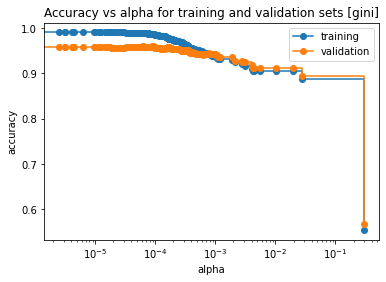

[Criterion: gini] Best CCP: 0.000062	 Accuracy: 96.02%	 Precision: 0.96	 Recall: 0.97	 F1 Score: 0.97

Decision Tree with entropy


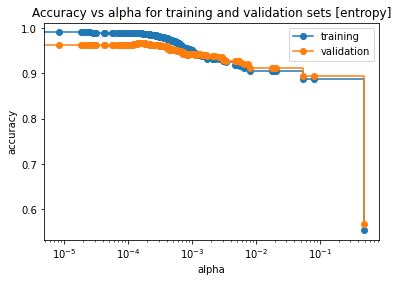

[Criterion: entropy] Best CCP: 0.000156	 Accuracy: 96.79%	 Precision: 0.97	 Recall: 0.98	 F1 Score: 0.97



In [64]:
from sklearn.tree import DecisionTreeClassifier

for criterion in ["gini", "entropy"]:
    print(f"Decision Tree with {criterion}\n====================================")
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    path = clf.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas = path.ccp_alphas
    
    clfs = []
    for ccp_alpha in ccp_alphas:
        clf = DecisionTreeClassifier(criterion=criterion, random_state=42, ccp_alpha=ccp_alpha)
        clf.fit(X_train, y_train)
        clfs.append(clf)

    train_scores = [clf.score(X_train, y_train) for clf in clfs]
    valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

    fig, ax = plt.subplots()
    ax.set_xlabel("alpha")
    ax.set_ylabel("accuracy")
    ax.set_title(f"Accuracy vs alpha for training and validation sets [{criterion}]")
    ax.plot(ccp_alphas, train_scores, marker='o', label="training",
            drawstyle="steps-post")
    ax.plot(ccp_alphas, valid_scores, marker='o', label="validation",
            drawstyle="steps-post")
    ax.set_xscale("log")
    ax.legend()
    plt.show()
    
    best_model_index = len(valid_scores) - np.argmax(valid_scores[::-1]) - 1
    
    clf = clfs[best_model_index]
    y_pred = clf.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)*100
    p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
    
    print(f"[Criterion: {criterion}] Best CCP: %.6f\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f\n" % (ccp_alphas[best_model_index], acc, p, r, f1))

### Random Forests:

In [68]:
from sklearn.ensemble import RandomForestClassifier

print("Random Forests Classifier\n====================================")
for d in np.arange(10, 22, 2):
    for n in np.arange(100, 220, 20):
        clf = RandomForestClassifier(n_estimators=n, criterion="entropy", max_depth=d, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)*100
        p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
        print("[N_Est: %d\t Depth: %d]\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f" % (n, d, acc, p, r, f1))

Random Forests Classifier
[N_Est: 100	 Depth: 10]	 Accuracy: 95.30%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 120	 Depth: 10]	 Accuracy: 95.25%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 140	 Depth: 10]	 Accuracy: 95.25%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 160	 Depth: 10]	 Accuracy: 95.25%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 180	 Depth: 10]	 Accuracy: 95.21%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 200	 Depth: 10]	 Accuracy: 95.21%	 Precision: 0.94	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 100	 Depth: 12]	 Accuracy: 95.79%	 Precision: 0.95	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 120	 Depth: 12]	 Accuracy: 95.79%	 Precision: 0.95	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 140	 Depth: 12]	 Accuracy: 95.75%	 Precision: 0.95	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 160	 Depth: 12]	 Accuracy: 95.75%	 Precision: 0.95	 Recall: 0.98	 F1 Score: 0.96
[N_Est: 180	 Depth: 12]	 Accuracy: 95.75%	 Precision: 0.95	 Recall: 0.98	 F1 Score: 

#### For best model: Number of Estimators = 100, Depth = 18 (Accuracy = 96.61% & F1 Score = 0.97)

### Gradient Boosting:

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

print("Gradient Boosting Classifiers\n====================================")
for lr in np.logspace(-2, 0, 5):
    for n in [100, 150, 200]:
        for md in [3, 5, 10, 15, 20]:
            clf = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, max_depth=md, random_state=42)
            clf.fit(X_train, y_train)

            y_pred = clf.predict(X_valid)
            acc = accuracy_score(y_valid, y_pred)*100
            p, r, f1, _ = precision_recall_fscore_support(y_valid, y_pred, average="binary")
            print("[N_Est: %d\t Learning Rate: %.4f\t Depth:%d]\t Accuracy: %.2f%%\t Precision: %.2f\t Recall: %.2f\t F1 Score: %.2f" % (n, lr, md, acc, p, r, f1))

Gradient Boosting Classifiers
[N_Est: 100	 Learning Rate: 0.0100	 Depth:3]	 Accuracy: 92.31%	 Precision: 0.93	 Recall: 0.94	 F1 Score: 0.93
[N_Est: 100	 Learning Rate: 0.0100	 Depth:5]	 Accuracy: 93.76%	 Precision: 0.92	 Recall: 0.97	 F1 Score: 0.95
[N_Est: 100	 Learning Rate: 0.0100	 Depth:10]	 Accuracy: 95.66%	 Precision: 0.96	 Recall: 0.96	 F1 Score: 0.96
[N_Est: 100	 Learning Rate: 0.0100	 Depth:15]	 Accuracy: 95.79%	 Precision: 0.96	 Recall: 0.97	 F1 Score: 0.96
[N_Est: 100	 Learning Rate: 0.0100	 Depth:20]	 Accuracy: 95.70%	 Precision: 0.96	 Recall: 0.97	 F1 Score: 0.96
[N_Est: 150	 Learning Rate: 0.0100	 Depth:3]	 Accuracy: 92.76%	 Precision: 0.93	 Recall: 0.95	 F1 Score: 0.94
[N_Est: 150	 Learning Rate: 0.0100	 Depth:5]	 Accuracy: 93.80%	 Precision: 0.93	 Recall: 0.97	 F1 Score: 0.95
[N_Est: 150	 Learning Rate: 0.0100	 Depth:10]	 Accuracy: 96.11%	 Precision: 0.96	 Recall: 0.97	 F1 Score: 0.97
[N_Est: 150	 Learning Rate: 0.0100	 Depth:15]	 Accuracy: 95.79%	 Precision: 0.96	 Reca

[N_Est: 200	 Learning Rate: 1.0000	 Depth:20]	 Accuracy: 96.07%	 Precision: 0.98	 Recall: 0.95	 F1 Score: 0.96


#### For best model: Number of Estimators = 100, Learning Rate = 0.3162, Depth = 5 (Accuracy = 97.06% & F1 Score = 0.97)

## Feature Analysis of Best Model (Gradient Boosting):

In [7]:
clf_best = GradientBoostingClassifier(n_estimators=100, learning_rate=np.power(0.1, 0.5), max_depth=5, random_state=42)
clf_best.fit(X_train, y_train)

feature_imp = clf_best.feature_importances_
feature_rank = np.argsort(clf_best.feature_importances_)
features = df.columns[:-1][feature_rank][::-1]                    # Features in decreasing order of importance

In [131]:
from sklearn.model_selection import cross_val_score

for i in range(30, 5, -2):
    feature_df_subset = df[features[:i]]
    
    X = feature_df_subset.values[:, :-1]
    y = df.values[:, -1]
    
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=np.power(0.1, 0.5), max_depth=5, random_state=42)
    
    # Now, we use k-fold cross validation
    score = np.mean(cross_val_score(clf, X, y, cv=10))*100
    
    print("Number of features: %d\t Accuracy: %.2f%%" % (i, score))


Number of features: 30	 Accuracy: 97.29%
Number of features: 28	 Accuracy: 97.31%
Number of features: 26	 Accuracy: 97.25%
Number of features: 24	 Accuracy: 97.16%
Number of features: 22	 Accuracy: 97.15%
Number of features: 20	 Accuracy: 96.98%
Number of features: 18	 Accuracy: 96.84%
Number of features: 16	 Accuracy: 96.28%
Number of features: 14	 Accuracy: 95.83%
Number of features: 12	 Accuracy: 95.28%
Number of features: 10	 Accuracy: 94.46%
Number of features: 8	 Accuracy: 93.89%
Number of features: 6	 Accuracy: 92.32%


### Analysis:

We see a tradeoff between accuracy & number of features used. Yet, we notice that decreasing the number of features to 20 does not drastically reduce the accuracy.

Thus, we could go ahead with the Top 20 most important features.

In [8]:
print("Top 20 Most Important Features for Phishing Detection:")
for i, feature in enumerate(features[:20]):
    print(i+1, "\t", feature)

Top 20 Most Important Features for Phishing Detection:
1 	 SSLfinal_State
2 	 URL_of_Anchor
3 	 Links_in_tags
4 	 web_traffic
5 	 Prefix_Suffix
6 	 having_Sub_Domain
7 	 SFH
8 	 Request_URL
9 	 Links_pointing_to_page
10 	 Google_Index
11 	 URL_Length
12 	 DNSRecord
13 	 Domain_registeration_length
14 	 having_IP_Address
15 	 HTTPS_token
16 	 Page_Rank
17 	 age_of_domain
18 	 popUpWidnow
19 	 Iframe
20 	 on_mouseover


## Training & Saving the Final Model

In [9]:
feature_df_subset = df[features[:20]]
X = feature_df_subset.values
y = df.values[:, -1]
best_model = GradientBoostingClassifier(n_estimators=100, learning_rate=np.power(0.1, 0.5), max_depth=5, random_state=42)
best_model.fit(X, y)

GradientBoostingClassifier(learning_rate=0.31622776601683794, max_depth=5,
                           random_state=42)

In [10]:
import pickle
pickle.dump(best_model, open("phishing_website_detection_model.sav", "wb"))